#### GISC 420 T1 2022
# Overlay and spatial join

In [2]:
# You need to run this cell to get things setup
%matplotlib inline

import matplotlib
import matplotlib.pyplot as pyplot

import geopandas

The classic GIS operation *par excellence* is overlay of various kinds. Overlays are applied between two data layers, and are `GeoDataFrame` operations. In `geopandas`this means that the attribute data tables also get involved.

## Load a couple of different datasets
This time we need a couple of datasets that overlap in various ways, so we can understand how the overlay operations work. I made a couple for this purpose, so load them:

In [3]:
s1 = geopandas.read_file('squares1.geojson')
s2 = geopandas.read_file('squares2.geojson')

<AxesSubplot:>

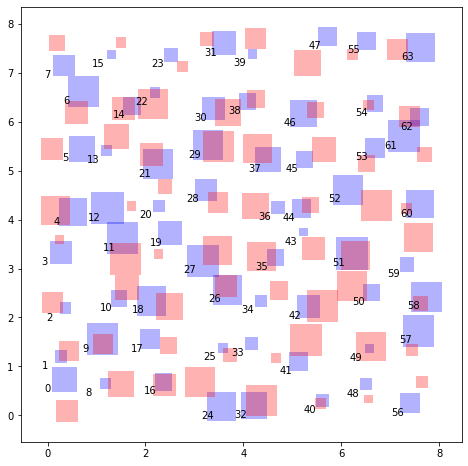

In [4]:
fig = pyplot.figure(figsize=(8,8))
ax = fig.add_subplot(111)

s1.plot(ax=ax, facecolor='b', alpha=0.3)
for p, label in zip(s1.geometry, s1.A):
    ax.annotate(xy=(p.centroid.x-0.4, p.centroid.y-0.25), text=label)
s2.plot(ax=ax, facecolor='r', alpha=0.3)

## `overlay` operations
OK. So let's see what happens when we use the `geopandas.overlay` function on these datasets.

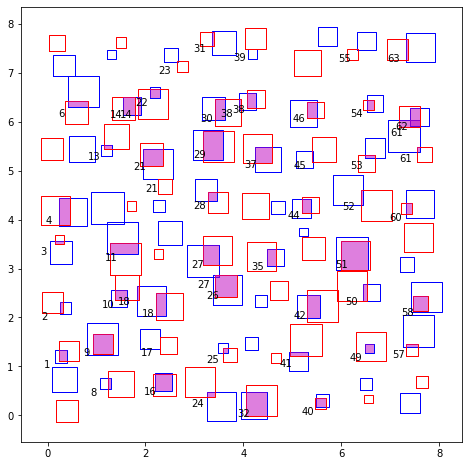

In [5]:
s1_o_s2 = geopandas.overlay(s1, s2, how="intersection")

fig = pyplot.figure(figsize=(8,8))
ax = fig.add_subplot(111)
s1.plot(ax=ax, facecolor='None', edgecolor='b')
s2.plot(ax=ax, facecolor='None', edgecolor='r')
s1_o_s2.plot(ax=ax, facecolor='m', linewidth=0, alpha=0.5)
for p, label in zip(s1_o_s2.geometry, s1_o_s2.A):
    ax.annotate(xy=(p.centroid.x-0.4, p.centroid.y-0.25), text=label)

So spatially, this has produced a `GeoDataFrame` that is the intersection of the two input layers. In attribute terms, we need to see what has happened also

In [6]:
s1_o_s2

,A,B,geometry
0,1,1001,"POLYGON ((0.404 1.333, 0.404 1.119, 0.238 1.11..."
1,2,1002,"POLYGON ((0.247 2.310, 0.315 2.310, 0.315 2.09..."
2,3,1003,"POLYGON ((0.341 3.560, 0.341 3.504, 0.158 3.50..."
3,4,1004,"POLYGON ((0.244 4.437, 0.462 4.437, 0.462 3.88..."
4,6,1006,"POLYGON ((0.415 6.412, 0.830 6.412, 0.830 6.29..."
5,8,1008,"POLYGON ((1.297 0.774, 1.297 0.546, 1.235 0.54..."
6,9,1009,"POLYGON ((0.927 1.671, 1.340 1.671, 1.340 1.25..."
7,10,1010,"POLYGON ((1.633 2.555, 1.633 2.363, 1.371 2.36..."
8,18,1010,"POLYGON ((1.820 2.643, 1.866 2.643, 1.866 2.36..."
9,11,1011,"POLYGON ((1.854 3.303, 1.281 3.303, 1.281 3.51..."


So elements in the new dataset inherit the attributes of both the input datasets.  The `how` option sent to the `overlay` function yields different results. The options are listed [here](https://geopandas.org/en/stable/docs/user_guide/set_operations.html). Give them each a try in the cell above and see what happens.  It's worth saying that not all of these will make sense in all situations.

It is also worth noting that `overlay` can currently only be applied between two polygon layers.

## `sjoin` operations
Overlay operations cause changes in the geometry of the included elements. Spatial join operations which are invoked by the `geopandas.sjoin()` function usually do not, but will append attributes from one dataset on to another depending on the spatial relation between the datasets.

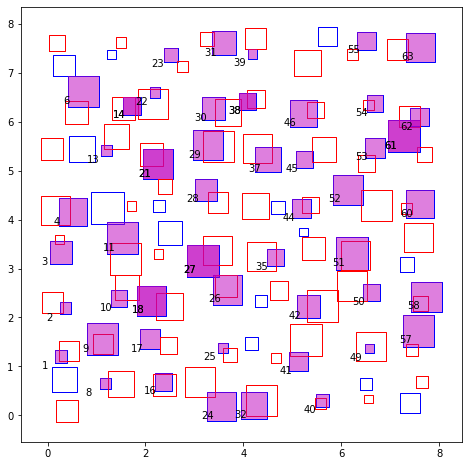

In [9]:
s1_j_s2 = geopandas.sjoin(s1, s2, how='inner', predicate='intersects')

fig = pyplot.figure(figsize=(8,8))
ax = fig.add_subplot(111)

s1.plot(ax=ax, facecolor='None', edgecolor='b', linewidth=1)
s2.plot(ax=ax, facecolor='None', edgecolor='r', linewidth=1)
s1_j_s2.plot(ax=ax, facecolor='m', linewidth=0, alpha=0.5)

for p, label in zip(s1_j_s2.geometry, s1_j_s2.A):
    ax.annotate(xy=(p.centroid.x-0.4, p.centroid.y-0.25), text=label)

In [8]:
s1_j_s2

,A,geometry,index_right,B
1,1,"POLYGON ((0.150 1.080, 0.150 1.333, 0.404 1.33...",1,1001
2,2,"POLYGON ((0.247 2.076, 0.247 2.310, 0.482 2.31...",2,1002
3,3,"POLYGON ((0.045 3.094, 0.045 3.560, 0.510 3.56...",3,1003
4,4,"POLYGON ((0.244 3.865, 0.244 4.437, 0.815 4.43...",4,1004
6,6,"POLYGON ((0.415 6.294, 0.415 6.925, 1.047 6.92...",6,1006
8,8,"POLYGON ((1.069 0.546, 1.069 0.774, 1.297 0.77...",8,1008
9,9,"POLYGON ((0.798 1.232, 0.798 1.879, 1.445 1.87...",9,1009
10,10,"POLYGON ((1.296 2.219, 1.296 2.555, 1.633 2.55...",10,1010
18,18,"POLYGON ((1.820 2.040, 1.820 2.643, 2.423 2.64...",10,1010
11,11,"POLYGON ((1.215 3.303, 1.215 3.942, 1.854 3.94...",11,1011


Here, the options available are that `how` can be `inner` (the default), `left`, or `right`. When set to `inner` only the cases in the first `GeoDataFrame` that satisfy the spatial constraint specified by the `predicate` setting are retained, and they acquire relevant attributes from both datasets.  When `how` is set to `left` or `right` all elements in the specified dataset are retained in the output, but there will not be data available to be joined unless the spatial constrain is met.

The spatial constraint specified by `predicate` can be any of `intersects`, `within` or `contains`.  Again, try experimenting with these options above to see what happens.

Spatial join operations work between different types of geometries in the ways you might expect.

By combining `sjoin`, `overlay` and operations such as `buffer` a very wide variety of spatial relationships between datasets can be implemented, although it sometimes may require several steps to accomplish a particular desired task. 